In [3]:
DATOS=read.csv2("datos1.csv")
names(DATOS)

[1] "Participantes"     "edad"              "X1_metodo"        
 [4] "Ciclo_menstr"      "Desayuno"          "Durac_sueño"      
 [7] "Metod_antic_emerg" "tiempo.uso_antic"  "Mes_ult_menstr"   
[10] "Y1_moca"           "estres_nivel"      "estres_punt"

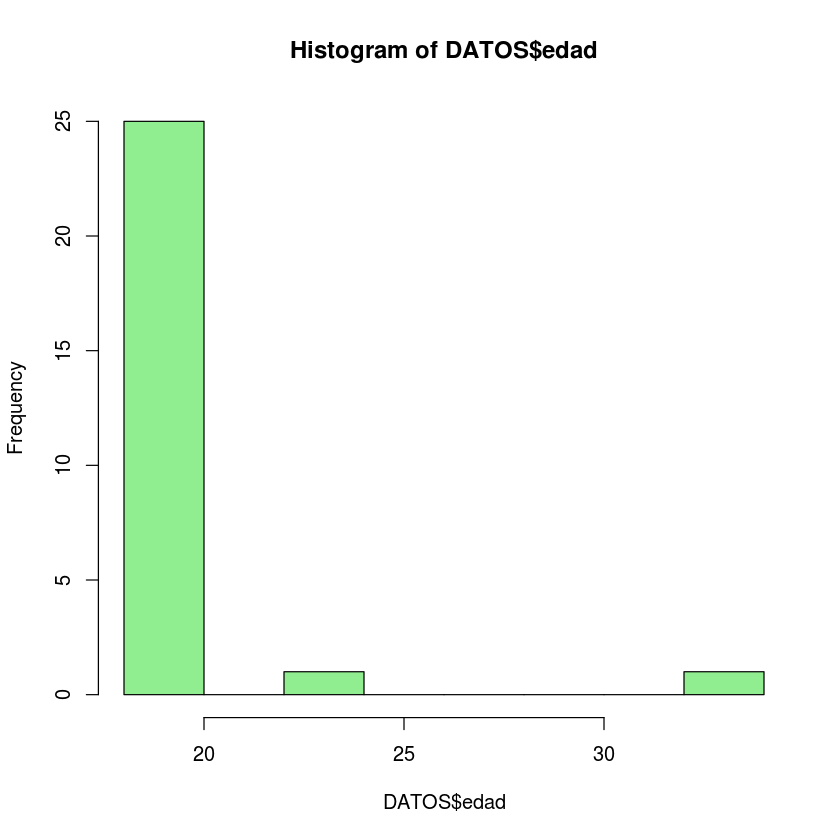

In [5]:
hist(DATOS$edad, col="lightgreen")

In [6]:
DATOS$X1_metodo

[1] pastillas pastillas jadelle   jadelle   jadelle   jadelle   inyeccion
 [8] inyeccion inyeccion no_uso    no_uso    no_uso    no_uso    no_uso   
[15] no_uso    no_uso    no_uso    no_uso    no_uso    no_uso    no_uso   
[22] no_uso    no_uso    no_uso    no_uso    no_uso    no_uso   
Levels: inyeccion jadelle no_uso pastillas

In [8]:
# Test de fisher
fisher.test(DATOS$X1_metodo,DATOS$Y1_moca)


	Fisher's Exact Test for Count Data

data:  DATOS$X1_metodo and DATOS$Y1_moca
p-value = 0.8879
alternative hypothesis: two.sided


In [10]:
# One Way Anova (Completely Randomized Design)
fit <- aov(Y1_moca ~ X1_metodo, data=DATOS) 
summary(fit)

            Df Sum Sq Mean Sq F value Pr(>F)
X1_metodo    3    8.1   2.691    0.13  0.941
Residuals   23  475.8  20.686               

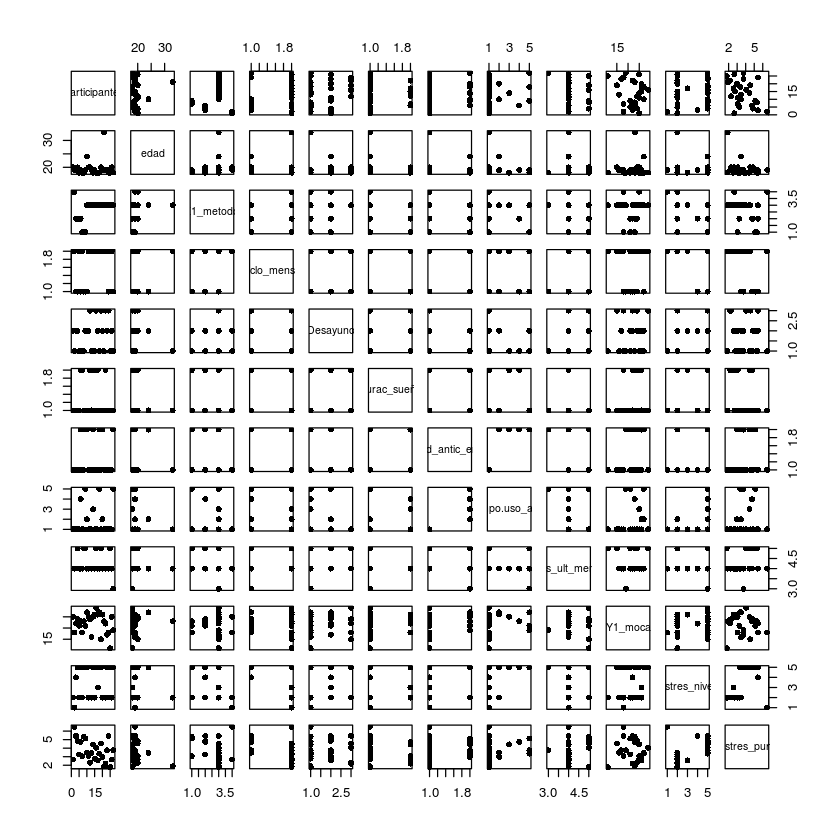

In [13]:
pairs(DATOS, pch=16)

# Segundo pilotaje


In [24]:
dat_2=read.csv2("exp_1.csv")
uso_met=!dat_2$metodo=="no_uso"
dat_2=data.frame(uso_met,dat_2)
summary(dat_2)

  uso_met               metodo        moca         estres     estres_punt   
 Mode :logical   inyeccion :28   Min.   :12.00   alto :  4   Min.   :1.130  
 FALSE:78        la_T      : 6   1st Qu.:19.00   bajo : 46   1st Qu.:2.850  
 TRUE :81        no_uso    :78   Median :22.00   medio:109   Median :3.260  
 NA's :0         pastillas :18   Mean   :21.39               Mean   :3.375  
                 subdermico:29   3rd Qu.:24.00               3rd Qu.:3.840  
                                 Max.   :29.00               Max.   :8.390  

In [25]:
fisher.test(dat_2$uso_met,dat_2$moca)

ERROR: Error in fisher.test(dat_2$uso_met, dat_2$moca): FEXACT error 7.
LDSTP is too small for this problem.
Try increasing the size of the workspace.


In [26]:
# One Way Anova (Completely Randomized Design)
fit_2 <- aov(moca ~ uso_met, data=dat_2) 
summary(fit_2)

             Df Sum Sq Mean Sq F value Pr(>F)
uso_met       1   18.9   18.91    1.33  0.251
Residuals   157 2232.9   14.22               

In [27]:
# One Way Anova (Completely Randomized Design)
fit_3 <- aov(moca ~ metodo, data=dat_2) 
summary(fit_3)

             Df Sum Sq Mean Sq F value Pr(>F)
metodo        4     57   14.24   0.999   0.41
Residuals   154   2195   14.25               

In [29]:
chisq.test(dat_2$metodo, dat_2$estres, correct=FALSE)

Warning message in chisq.test(dat_2$metodo, dat_2$estres, correct = FALSE):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  dat_2$metodo and dat_2$estres
X-squared = 12.678, df = 8, p-value = 0.1234


In [30]:
fit_4 <- aov(moca ~ estres, data=dat_2) 
summary(fit_4)

             Df Sum Sq Mean Sq F value Pr(>F)
estres        2   32.6   16.32   1.148   0.32
Residuals   156 2219.2   14.22               

In [37]:
cor.test(dat_2$moca, dat_2$estres_punt)


	Pearson's product-moment correlation

data:  dat_2$moca and dat_2$estres_punt
t = -0.4179, df = 157, p-value = 0.6766
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1880057  0.1229512
sample estimates:
        cor 
-0.03333389 


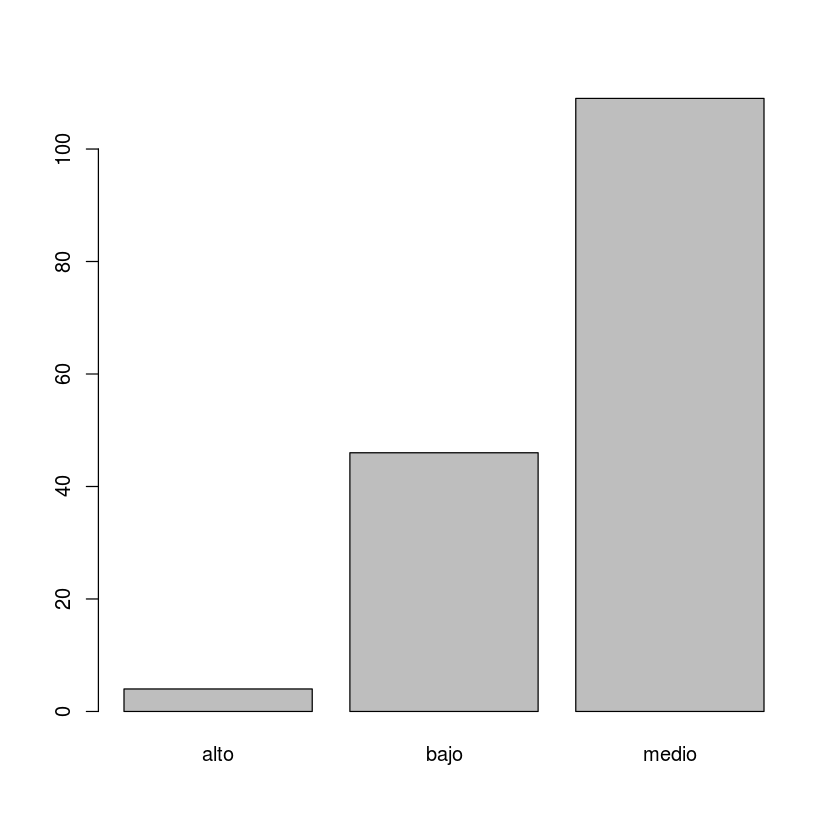

In [40]:
barplot(table(dat_2$estres))